In [1]:
import os
import sys
import sqlite3
from datetime import datetime
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
import ursse.path_assistant as pa
data_path = os.path.join(pa.shifts_folder,'shift_02_28_2020','transverse_scan') 
wd = pa.WorkingDirectory(data_path)
import ursse.transverse_scan.spad_counts as spad_counts
import ursse.transverse_scan.picomotor_pos as picomotor_pos
import ursse.transverse_scan.transverse_scan as transverse_scan
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir(data_path)

['test_scan_450_90el.db']

In [3]:
x_scan_path = wd.fi('test_scan_450_90el.db') 

In [7]:
picomotor_dates, picomotor_position, year = picomotor_pos.get_time_and_picomotor_pos_arr(x_scan_path)
picomotor_dates[-1]

datetime.datetime(2020, 2, 28, 19, 37, 7, 107000)

In [8]:
spad_rate_path = wd.fi("lumber_data_65_5.txt")
spad_dates, spad_cnts = spad_counts.get_time_and_counts_arr(year, spad_rate_path)


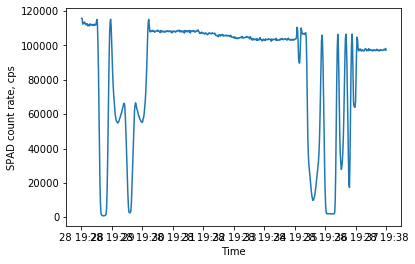

In [9]:
plt.plot(spad_dates, spad_cnts)
plt.xlabel("Time")
plt.ylabel("SPAD count rate, cps")
plt.show()

In [11]:
picomotor_positions, spad_count_rates = transverse_scan.get_positions_and_counts_arrays(x_scan_path, spad_rate_path)

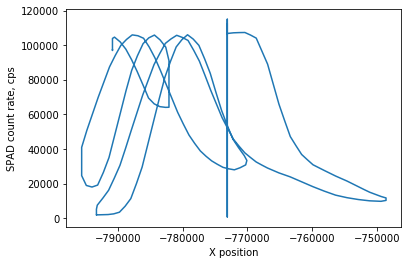

In [12]:
x_positions = picomotor_positions[3]
plt.plot(x_positions, spad_count_rates)
plt.xlabel("X position")
plt.ylabel("SPAD count rate, cps")
plt.show()

Testing how to plot 2D scans:

In [10]:
pos_test = picomotor_positions.copy()
n = 4
for i in range(n):
    cp = picomotor_positions.copy()
    cp[0,:] = picomotor_positions[0,0]-(i+1)*1000
    pos_test = np.concatenate((pos_test,cp),axis=1)
spad_count_rates_test = np.concatenate([spad_count_rates for i in range(n+1)])

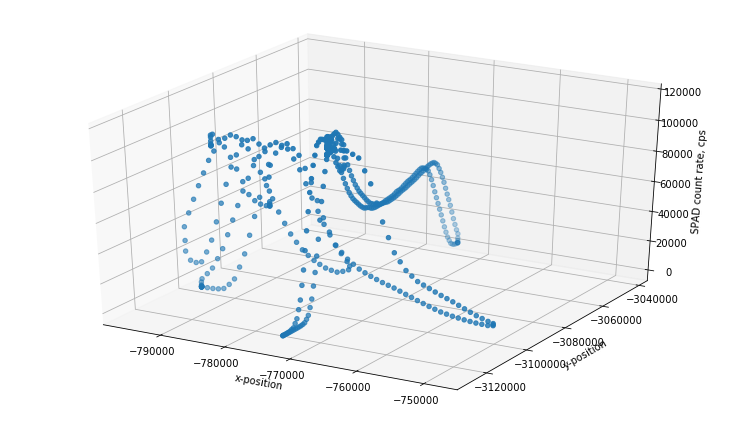

In [13]:
xs = picomotor_positions[3]
ys = picomotor_positions[0]
zs = spad_count_rates
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 7.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_zlabel('SPAD count rate, cps')
plt.show()

In [16]:
pos1 = -847496
pos2 = -802955
np.mean([pos1,pos2])

-825225.5